# Modelling 2D particle-particle collisions

In this final example, we bring together our learning from the previous examples to produce something much closer to a "real" DEM simulation, simulating a two-dimensional collision between two particles of arbitrary size and mass.

As ever, we begin by importing the relevant libraries:

In [1]:
# Importing the relevant libraries
import numpy as np                # Useful mathematical functions
import matplotlib.pyplot as plt   # Useful plotting functions

Now that we are simulating "real" particle-particle interactions (as opposed to a simple collision with an effectively infinitely massive object), we need to define not only the sizes of our objects, but also their masses:

In [2]:
# Giving the particles a size and a mass
a1 = 0.1
a2 = 0.1

m1 = 1/1000                     # Setting an arbitrary mass, here 1 gram
m2 = 1/1000                     # Initially setting both masses equal for simplicity
M = m1 + m2                     # The combined mass of the two particles

# Defining a restitution coefficient for the colliding particles
# For simplicity, we will assume that particle-particle and particle-wall collisions all share the same CoR
e = 0.8

# Setting initial positions for particles, this time as two-dimensional vectors
r1 = np.array([-1 , 0.5])       # first component gives x-position, second gives y-position
r2 = np.array([1 , 0.5])

#Setting initial velocities
v1 = np.array([1 , 0])          # first component gives x-velocity, second gives y-velocity
v2 = np.array([-1 , 0])

# Defining gravity
g = np.array([0 , -9.81])




Next, as before, we define the relevant simulation properties

In [3]:
t_max = 4   # The total length of time (in seconds) we wish to simulate

t = 0       # setting the initial, starting time as zero

dt = 0.025  # Setting the timestep

# Defining a pair of arrays to save data at every timestep
t_array = np.array([t])

r1_array = np.array([r1])
r2_array = np.array([r2])


With all our parameters set up, we can run our simulation.

In the present case, using the default parameters above, we have set our simulation up so that the particles will collide. This means that we need to apply a suitable collision model, otherwise particles will simply pass through one another!

For this simple example, we will implement a hard-sphere collision.

Text(0, 0.5, 'x (m)')

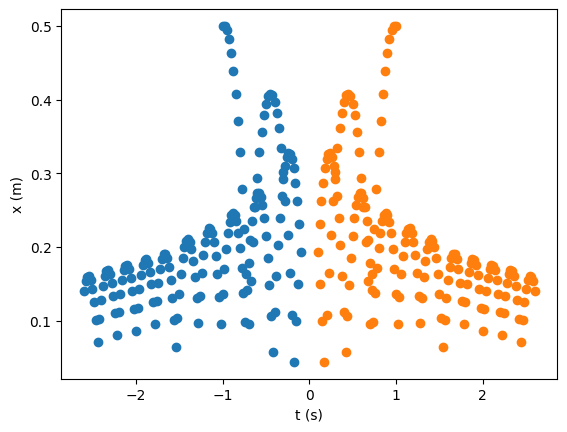

In [4]:
# Looping until the end condition is reached
while t < t_max :

  # Applying the Euler method to both particles

  # Updating position
  r1 = r1 + v1 * dt
  r2 = r2 + v2 * dt

  # Updating velocity
  v1 = v1 + g * dt
  v2 = v2 + g * dt

  # Checking if the particles interact with the wall at z = 0
  if (r1[1] <= a1) and (v1[1] <= 0):
    v1[1] = -e * v1[1]
  if (r2[1] <= a2) and (v2[1] <= 0):
    v2[1] = -e * v2[1]

  # Checking if the two particles are in contact
  # i.e. the separation of the particles' centres is less than their combined radii
  if np.linalg.norm(r1-r2) < np.absolute(a1 + a2):
    # If particles are in contact, applying eqns. (1) and (2) from section 1.2.1
    # Note that the last term is missing as e_t = 0
    u = v2 - v1 # The relative velocity between particles at the point of contact
    v1 = v1 + (m2/M) * ( (1 + e) * u )
    v2 = v2 - (m1/M) * ( (1 + e) * u )




  # Moving on to the next timestep
  t = t + dt

  # Adding new data to relevant arrays
  t_array = np.append(t_array,t)
  r1_array = np.vstack([r1_array, r1])
  r2_array = np.vstack([r2_array, r2])

# Plotting the data produced
plt.scatter(r1_array[:,0],r1_array[:,1])
plt.scatter(r2_array[:,0],r2_array[:,1])
plt.xlabel('t (s)')
plt.ylabel('x (m)')

As before, we can plot the particle trajectories (as above), but we can also visualise our particles:

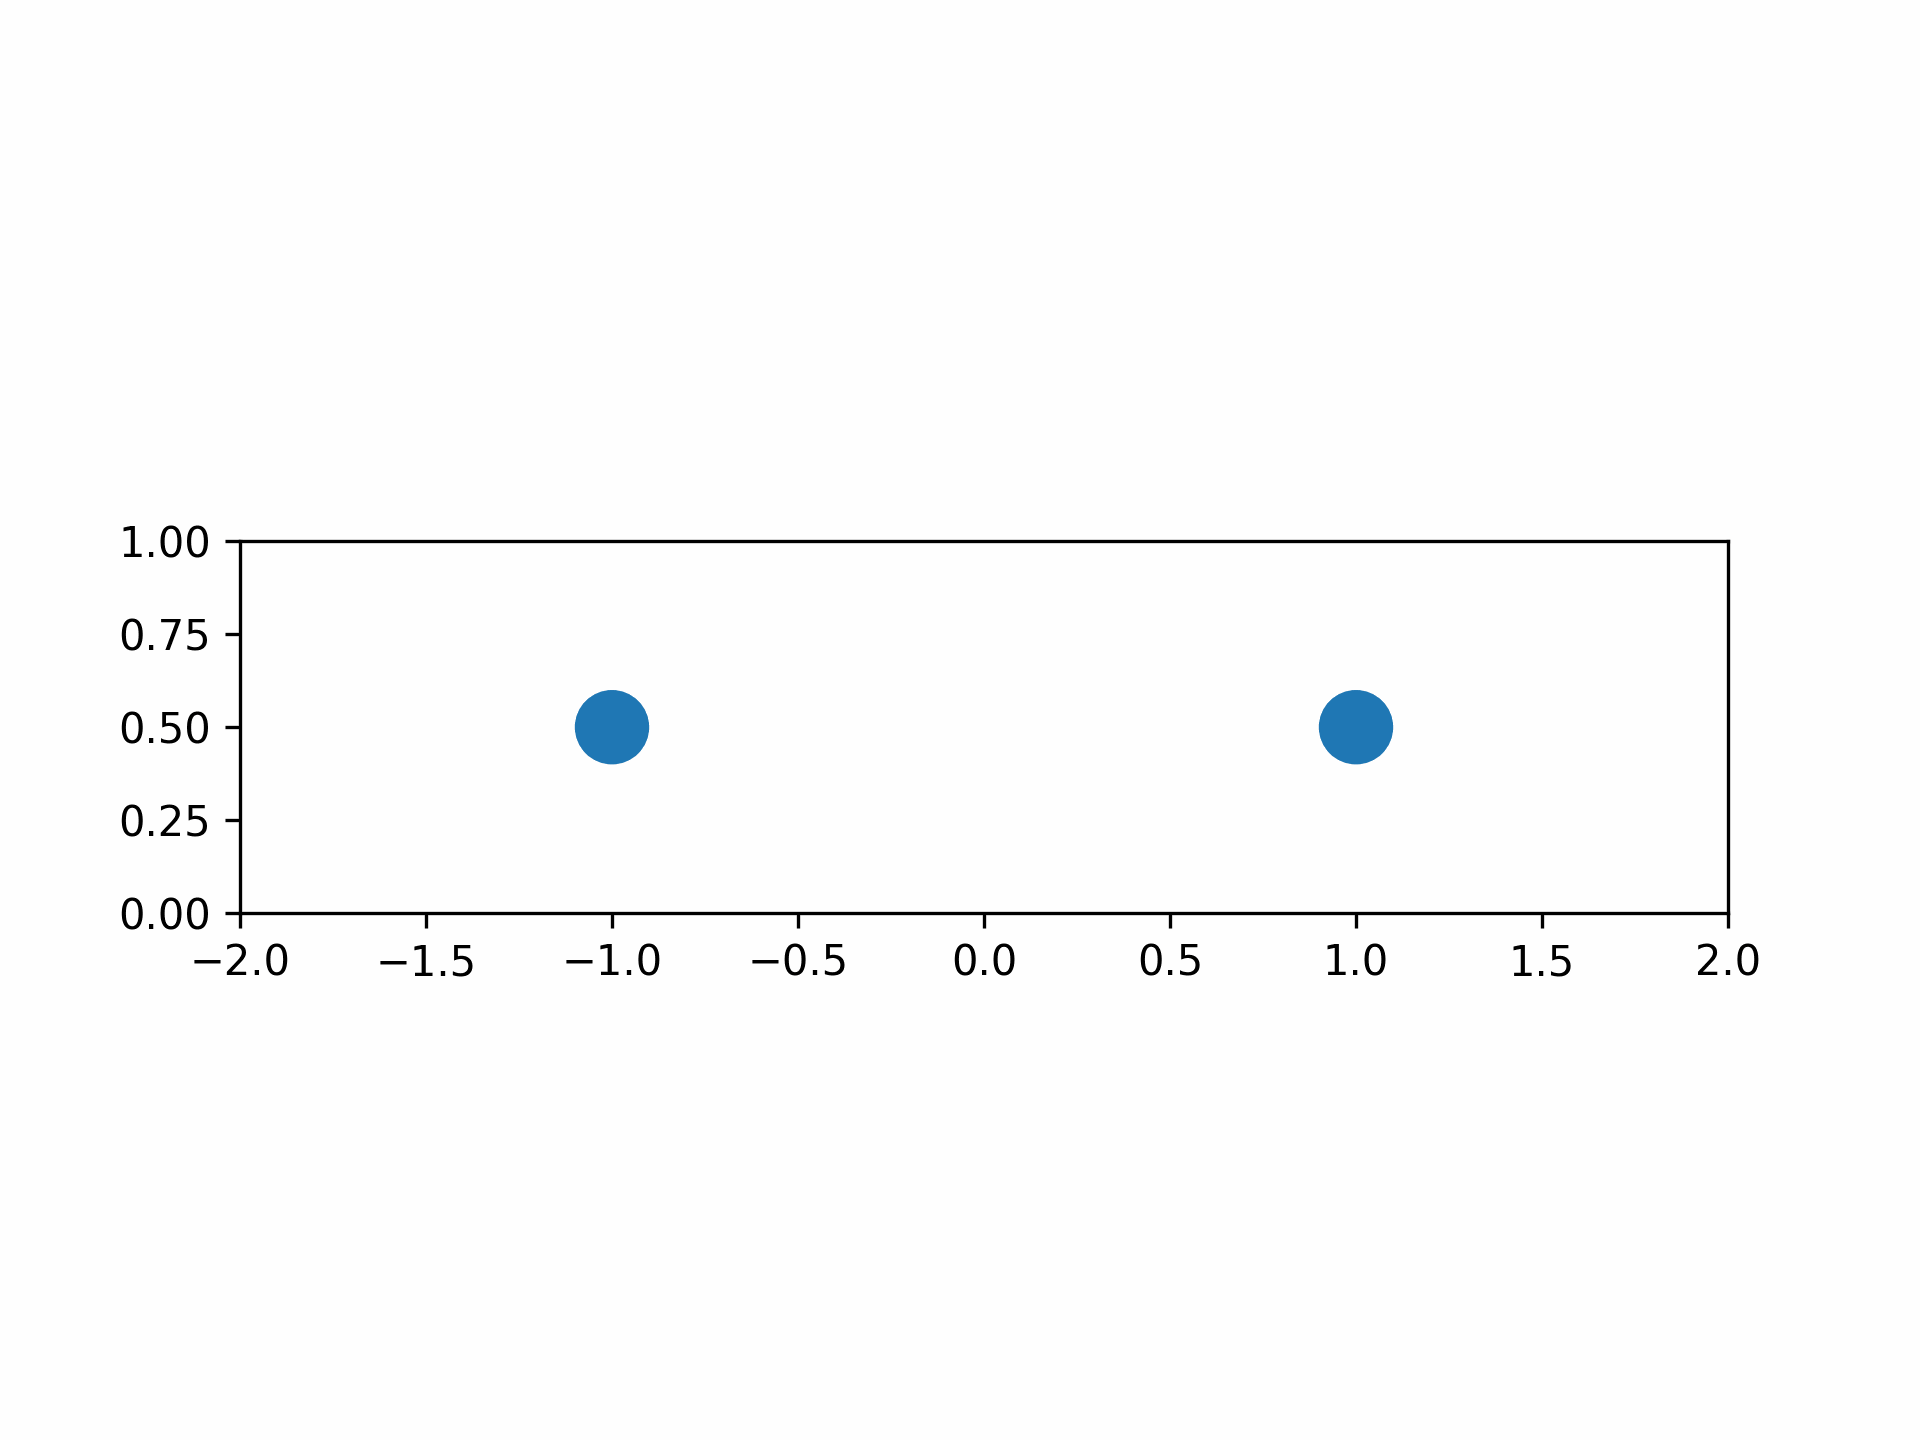

In [5]:
from matplotlib.animation import FuncAnimation

figure, axes = plt.subplots()

def animate(i):
  axes.clear()
  Drawing_colored_circle = plt.Circle(( r1_array[i,0] , r1_array[i,1] ), a1 )
  Drawing_colored_circle2 = plt.Circle(( r2_array[i,0] , r2_array[i,1] ), a2 )
  axes.set_aspect(1)
  axes.add_artist( Drawing_colored_circle )
  axes.add_artist( Drawing_colored_circle2 )
  axes.set_xlim([-2, 2])
  axes.set_ylim([0, 1])

ani = FuncAnimation(figure, animate, frames=t_array.size, repeat=False)
plt.close()

from matplotlib.animation import PillowWriter
ani.save("hard_sphere_collision.gif", dpi=300,
         writer=PillowWriter(fps=50))

from IPython.display import Image
with open('hard_sphere_collision.gif','rb') as file:
  display(Image(file.read()))

Try playing with some parameters, perhaps most pertinently the size, mass and restitution coefficient of the particles. How do these parameters influence the behaviours of the particles? Does it match your expectations?